In [1]:
using SymPy

In [2]:
@syms z β
u(z,β) = sqrt((z^2-β^2))　# 2乗損失

u (generic function with 1 method)

In [3]:
g = diff(u(z,β),β)

    -β      
────────────
   _________
  ╱  2    2 
╲╱  z  - β  

In [4]:
p(zt,b) = -b /(sqrt(abs(zt^2-b^2)))

p (generic function with 1 method)

In [5]:
p(3,1)

-0.35355339059327373

In [6]:
b = []
push!(b,1) # 初期値ｂ
val = Float32[]
for t in 2:20
    zt = rand()*10
    gt = b[t-1] /(sqrt.(abs.(zt.^2 .- b[t-1].^2)))
    push!(b,b[t-1] - (1/0.3)*gt)
    println(gt)
end

0.14642524580203392
0.060526850576829876
0.0806783372018239
0.010181917551707382
0.002453259048509208
-0.0008322665299636784
0.011184940791066062
-0.01991961316083141
0.0032135344359569026
0.002348001554066569
0.0017546257326226074
0.0024967467274447496
-0.0006264891119913932
7.108698144970448e-5
3.1224355317682975e-5
7.71680954067854e-6
3.421183033080681e-6
7.60683692011306e-7
6.307740560496552e-7


In [7]:
b

20-element Array{Any,1}:
  1          
  0.511916   
  0.31016    
  0.0412319  
  0.00729216 
 -0.000885367
  0.00188885 
 -0.0353943  
  0.0310044  
  0.0202926  
  0.012466   
  0.00661722 
 -0.00170527 
  0.000383031
  0.000146075
  4.19935e-5 
  1.62708e-5 
  4.86684e-6 
  2.33123e-6 
  2.28645e-7 

In [8]:
using Plots

In [9]:
plot(b)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
 
 
 
 
 
 y1

In [34]:
Pkg.build("SymPy")

INFO: Building SpecialFunctions
INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using /Users/noriakioshita/.pyenv/versions/anaconda3-5.1.0/bin/python (Python 3.6.4) at /Users/noriakioshita/.pyenv/versions/anaconda3-5.1.0/bin/python, libpython = /Users/noriakioshita/.pyenv/versions/anaconda3-5.1.0/lib/libpython3.6m
INFO: /Users/noriakioshita/.julia/v0.6/PyCall/deps/deps.jl has not changed
INFO: /Users/noriakioshita/.julia/v0.6/PyCall/deps/PYTHON has not changed


### 最急降下法

In [2]:
#using Plots
using PyPlot 
using SymPy # Plotsより後に読み込む(エラー対策）

@syms x1 x2
s(x1,x2) = 1/2 .* x1.^4 -2(x1.^2)*x2 + 4 .*x2.^2 + 8x1 + 8x2 # 最適化する関数
ff1 = diff(s(x1,x2),x1)
ff2 = diff(s(x1,x2),x2)

      2           
- 2⋅x₁  + 8⋅x₂ + 8

In [3]:
ff1

      3              
2.0⋅x₁  - 4⋅x₁⋅x₂ + 8

In [20]:
k = 1
ϵ = 0.03
x_val = []
α = 0.04
p = 0.5
c = 0.3

push!(x_val,[3.0,1.0]') # 初期点

for i in 1:100
    if sqrt((-2 .* x_val[k][1].^2+8 .*x_val[k][2]+8)^2+((2 .* x_val[k][1].^3)-4*x_val[k][1]*x_val[k][2]+8)^2) < ϵ　|| sqrt((-2 .* x_val[k][1].^2+8 .*x_val[k][2]+8)^2+((2 .* x_val[k][1].^3)-4*x_val[k][1]*x_val[k][2]+8)^2) == Inf
        return 0
    end
    
    dk = -[-2 .* x_val[k][1].^2+8 .*x_val[k][2]+8,(2 .* x_val[k][1].^3)-4*x_val[k][1]*x_val[k][2]+8]'
    
    # 直線探索でαを決定する．
    lk = [x_val[k][1],x_val[k][2]]' + α*dk
    
    
    #while ((1/2).*lk[1].^4 + 2 .*lk[1].^2 .*lk[2] +8 .*lk[1].+8 .*lk[2]) <= (((1/2).*x_val[k][1].^4 + 2 .*x_val[k][1].^2 .*x_val[k][2] + 8 .*x_val[k][1] .+8 .*x_val[k][2])+ c*dot([2 .* x_val[k][1].^2+8*(2 .* x_val[k][2].^3) .+4 .*x_val[k][1] .*x_val[k][2].+8], dk').*α)
    for i in 1:20
        if ((1/2).*lk[1].^4 + 2 .*lk[1].^2 .*lk[2] +4 .*lk[2]^2+8 .*lk[1].+8 .*lk[2]) <= (((1/2).*x_val[k][1].^4 + 2 .*x_val[k][1].^2 .*x_val[k][2] +4 .* x_val[k][2].^2+ 8 .*x_val[k][1] .+8 .*x_val[k][2])+ c*dot([-2 .* x_val[k][1].^2+8 .*x_val[k][2]+8,(2 .* x_val[k][1].^3)-4*x_val[k][1]*x_val[k][2]+8], dk').*α)
            break
        end  
        println("lk: ",((1/2).*lk[1].^4 + 2 .*lk[1].^2 .*lk[2] +4 .*lk[2]+8 .*lk[1].+8 .*lk[2]))
        println("式ｍ：　", (((1/2).*x_val[k][1].^4 + 2 .*x_val[k][1].^2 .*x_val[k][2] +4 .* x_val[k][2].^2+ 8 .*x_val[k][1] .+8 .*x_val[k][2])+ c*dot([-2 .* x_val[k][1].^2+8 .*x_val[k][2]+8,(2 .* x_val[k][1].^3)+4*x_val[k][1]*x_val[k][2]+8], dk').*α))
        α = p*α
        println("α: ", α)
        #lk <＝ 式ｍになれば終了．そうでなければ最初のステップへ
        
    end
    
    #α = p*α
    println(α)
    push!(x_val,x_val[k]+α.*dk)
    k = k + 1
    #println("lk: ",lk)
    
    # ||∇f(xk)||
    println(sqrt((-2 .* x_val[k][1].^2+8 .*x_val[k][2]+8)^2+((2 .* x_val[k][1].^3)-4*x_val[k][1]*x_val[k][2]+8)^2))
end

0.04
81.00932019575387
lk: -32.82496568142467
式ｍ：　-8.800386710618106
α: 0.02
lk: -32.82496568142467
式ｍ：　18.93135288469095
α: 0.01
lk: -32.82496568142467
式ｍ：　32.79722268234548
α: 0.005
lk: -32.82496568142467
式ｍ：　39.73015758117274
α: 0.0025
lk: -32.82496568142467
式ｍ：　43.19662503058637
α: 0.00125
lk: -32.82496568142467
式ｍ：　44.92985875529319
α: 0.000625
lk: -32.82496568142467
式ｍ：　45.79647561764659
α: 0.0003125
lk: -32.82496568142467
式ｍ：　46.2297840488233
α: 0.00015625
lk: -32.82496568142467
式ｍ：　46.446438264411654
α: 7.8125e-5
lk: -32.82496568142467
式ｍ：　46.55476537220583
α: 3.90625e-5
lk: -32.82496568142467
式ｍ：　46.60892892610291
α: 1.953125e-5
lk: -32.82496568142467
式ｍ：　46.63601070305146
α: 9.765625e-6
lk: -32.82496568142467
式ｍ：　46.64955159152573
α: 4.8828125e-6
lk: -32.82496568142467
式ｍ：　46.65632203576287
α: 2.44140625e-6
lk: -32.82496568142467
式ｍ：　46.659707257881436
α: 1.220703125e-6
lk: -32.82496568142467
式ｍ：　46.66139986894072
α: 6.103515625e-7
lk: -32.82496568142467
式ｍ：　46.66224617447036

In [21]:
x_val

101-element Array{Any,1}:
 [3.0 1.0]  
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 ⋮          
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]
 [3.08 -1.0]

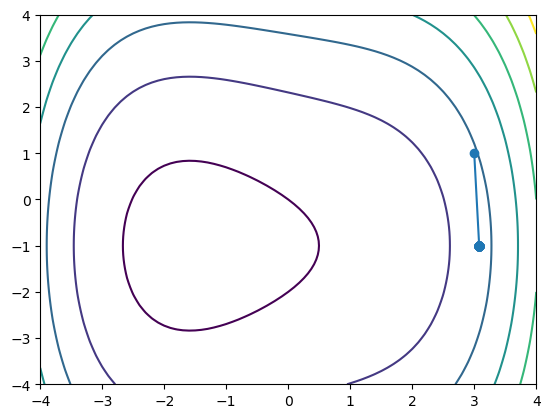

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12e78e6a0>

In [22]:
x1,x2 = (collect(-4:0.1:4),collect(-4:0.1:4))
x1_grid = repeat(x1',outer=(length(x2),1))
x2_grid = repeat(x2, outer=(1,length(x1)))
axes()[:contour](x1_grid,x2_grid,s(x1_grid,x2_grid))
axes()[:plot]([x_val[i][1] for i in 1:length(x_val) ],[x_val[j][2] for j in 1:length(x_val)],marker="o")